In [5]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
# df.head()

# Example User Stories & Correlations

In [12]:
# “As a resident, I want to know if longer messages tend to include links, so I can understand how people share detailed information.”
# Correlation: message_length ↔ has_link
# Viz: Boxplot / violinplot of message length split by link presence.

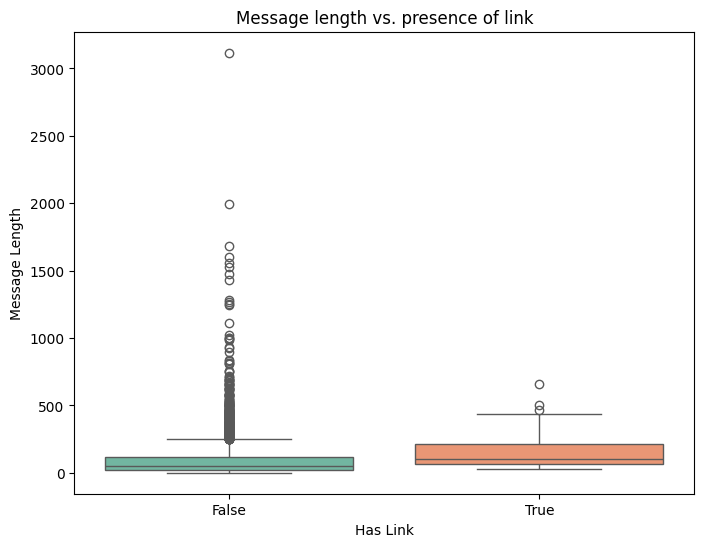

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='has_link',
    y='message_length',
    palette='Set2'
)
plt.title("Message length vs. presence of link")
plt.xlabel("Has Link")
plt.ylabel("Message Length")
plt.show()

In [13]:
# “As a moderator, I want to see whether emoji use is more common in casual hours (evenings/weekends), so I can understand community tone.”
# Correlation: has_emoji ↔ (hour, day_of_week)
# Viz: Heatmap of emoji frequency across hours/days.

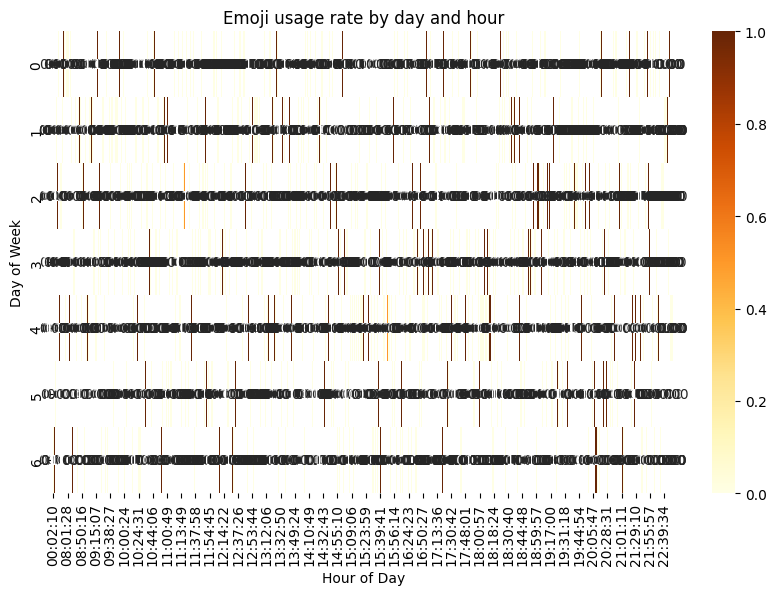

In [8]:
plt.figure(figsize=(10, 6))
emoji_pivot = df.pivot_table(
    values='has_emoji',
    index='day_of_week',
    columns='hour',
    aggfunc='mean'
)

sns.heatmap(emoji_pivot, cmap="YlOrBr", annot=True, fmt=".2f")
plt.title("Emoji usage rate by day and hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


In [ ]:
# Top Contributors vs Others (Message Length)
# “As a curious neighbor, I want to know whether top contributors (is_topk) write longer messages than others.”
# Correlation: is_topk ↔ message_length
# Viz: KDE plot or violinplot comparing message length distribution between top contributors vs others.

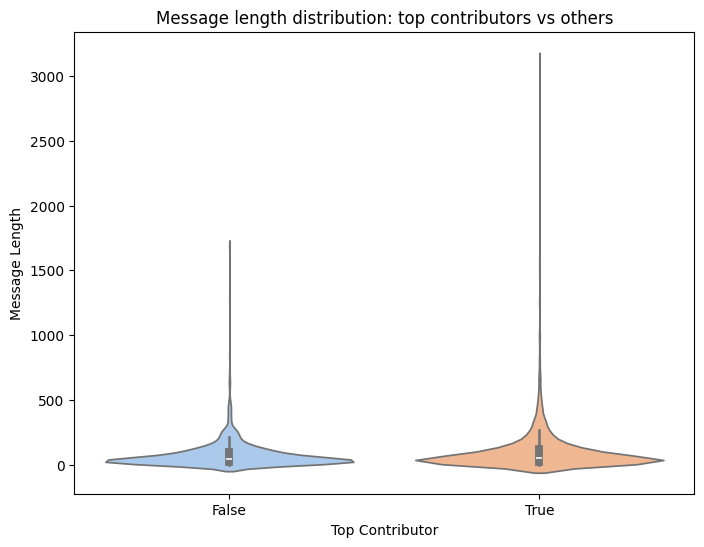

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='is_topk',
    y='message_length',
    palette='pastel',
    inner='box'
)
plt.title("Message length distribution: top contributors vs others")
plt.xlabel("Top Contributor")
plt.ylabel("Message Length")
plt.show()


In [16]:
# Weekend vs Weekday Message Length

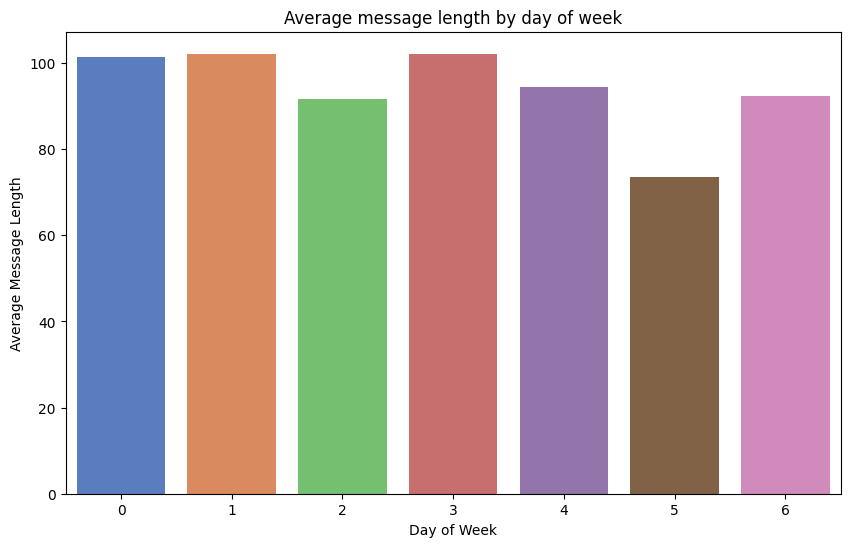

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='day_of_week',
    y='msg_length',
    estimator='mean',
    ci=None,
    palette='muted'
)
plt.title("Average message length by day of week")
plt.xlabel("Day of Week")
plt.ylabel("Average Message Length")
plt.show()


In [18]:
# Link Sharing by Hour

In [21]:
# plt.figure(figsize=(10, 6))
# sns.lineplot(
#     data=link_rate,
#     x='hour',
#     y='has_link',
#     marker='o'
# )
# plt.title("Proportion of messages with links by hour")
# plt.xlabel("Hour of Day")
# plt.ylabel("Proportion with Link")
# plt.show()


In [22]:
# Emoji Use vs Message Length

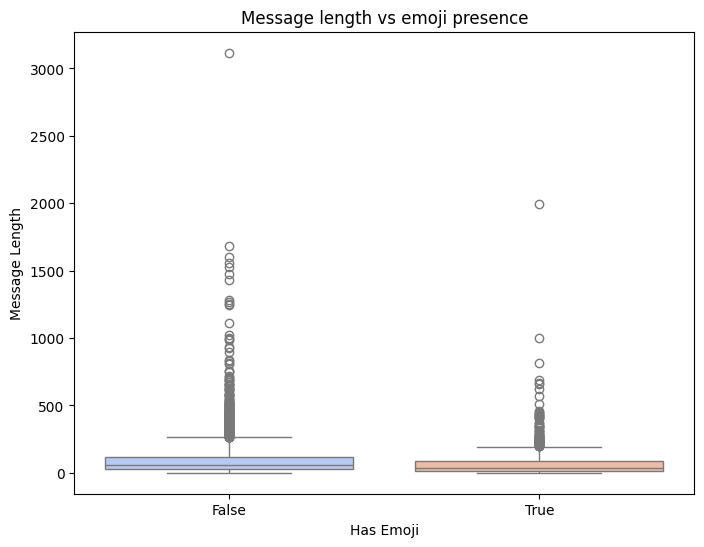

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='has_emoji',
    y='message_length',
    palette='coolwarm'
)
plt.title("Message length vs emoji presence")
plt.xlabel("Has Emoji")
plt.ylabel("Message Length")
plt.show()


In [24]:
# Emoji Use by Day of Week

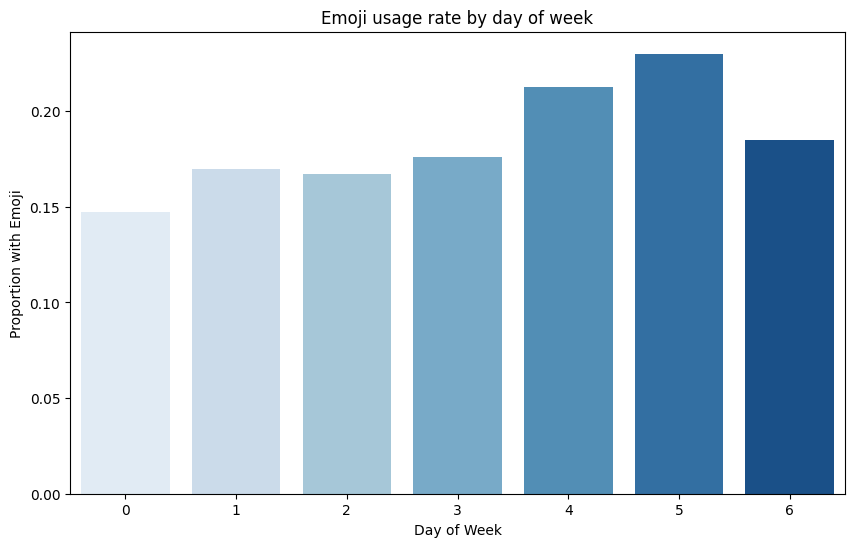

In [25]:
plt.figure(figsize=(10, 6))
emoji_rate = df.groupby('day_of_week')['has_emoji'].mean().reset_index()

sns.barplot(
    data=emoji_rate,
    x='day_of_week',
    y='has_emoji',
    palette='Blues'
)
plt.title("Emoji usage rate by day of week")
plt.xlabel("Day of Week")
plt.ylabel("Proportion with Emoji")
plt.show()
